In [9]:
import math
import random as rnd
from numpy import array_equal


class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()
        stuck = 0
        while True:
            # Obtain best neighbor state from current one
            neighbor = problem.bestNeighbor(current)
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=25):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)
        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Hill climbing')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0
        while True:
            T = schedule(t)
            t += 1

            if T <= 0:
                problem.printState(current, 'Simulated annealing')
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current) # Positive is good

            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

    def schedule(time):
        T0 = 100
        alpha = 0.99
        return T0 * alpha ** time


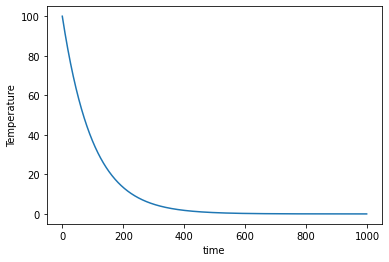

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([SearchAlgorithms.schedule(i) for i in range(1000)])
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

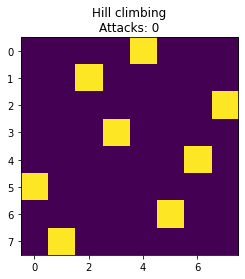

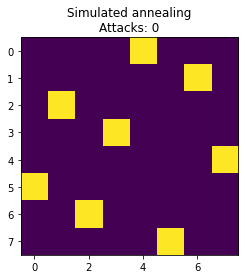

[5, 7, 2, 4, 8, 1, 3, 6]

In [11]:
from NQueens import NQueens
nq = NQueens(8)
SearchAlgorithms.hillClimbingWithRandomRestart(nq)
SearchAlgorithms.simulatedAnnealing(nq, SearchAlgorithms.schedule)


[21.38, 25.93, 22.49, 38.66, 12.31, 99.7, 26.81, 46.78, 59.62, 75.37, 34.16, 72.4, 88.36, 71.28, 96.61, 95.24, 15.43, 3.1, 75.11, 26.52]


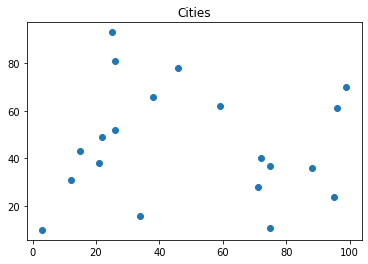

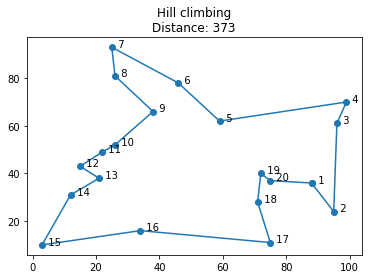

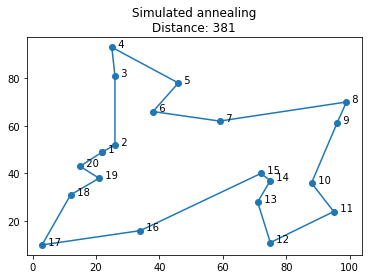

[22.49,
 26.52,
 26.81,
 25.93,
 46.78,
 38.66,
 59.62,
 99.7,
 96.61,
 88.36,
 95.24,
 75.11,
 71.28,
 75.37,
 72.4,
 34.16,
 3.1,
 12.31,
 21.38,
 15.43]

In [12]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(20)
SearchAlgorithms.hillClimbingWithRandomRestart(ts)
SearchAlgorithms.simulatedAnnealing(ts, SearchAlgorithms.schedule)
